In [2]:
# Load the model
import asyncio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from dotenv import load_dotenv

# Import the recommender classes
from recommender import AsyncOpenAIClient, CosineSimilarityCalculator, EmbeddingRecommender

# Import analysis
from confidenceAnalysis import generate_confidence_matrix, plot_confidence_heatmap

# Load environment variables
load_dotenv()

# Configuration setup
config = {
    "OPENAI_API_KEY": os.getenv("OPENAI_API_KEY"),
    "OPENAI_API_VERSION": os.getenv("OPENAI_API_VERSION"),
    "OPENAI_API_BASE": os.getenv("OPENAI_API_BASE"),
    "OPENAI_ORGANIZATION_ID": os.getenv("OPENAI_ORGANIZATION_ID"),
    "GENERATOR_MODEL": os.getenv("GENERATOR_MODEL", "gpt-4"),  # Set default if not in env
    "RECOMMENDER_MODEL": os.getenv("RECOMMENDER_MODEL", "gpt-4"),
    "OPENAI_EMBEDDING_MODEL": os.getenv("OPENAI_EMBEDDING_MODEL", "text-embedding-ada-002")
}

# Initialize components
openai_client = AsyncOpenAIClient(config)
similarity_calculator = CosineSimilarityCalculator()
recModel = EmbeddingRecommender(openai_client, similarity_calculator)

emb_df = pd.read_pickle('embeddings.pkl')
undergrad = [100, 200, 300, 400, 500]

recModel.load_courses(emb_df)

In [ ]:
bio_sus_prompts = [
    "I'm a biologist who's also interested in sustainable energy.  What classes might you recommend?",
    "I'm a biology student who's also interested in sustainable energy.  What classes might you recommend?",
    "I'm interested in biology and sustainable energy.  What classes might you recommend?"
]

math_ai_prompts = [
    "I'm a math major who's also interested in artificial intelligence. What classes might you recommend?",
    "I'm a math student who's also interested in machine learning. What classes might you recommend?",
    "I'm interested in math and artificial intelligence. What classes might you recommend?"
]

eng_prompts = [
    "I am a first year student in English and very interested in 19th century Russian literature. What classes might you recommend?",
    "I am a first year student in English and very interested in 19th century Russian literature.",
    "I am a freshman and I am interested in 19th century Russian literature. What classes might you recommend?"
]
names = ["bio_sus_", "math_ai_", "eng_"]

prompts = [bio_sus_prompts, math_ai_prompts, eng_prompts]

for i, prompt in enumerate(prompts):
    df = await generate_confidence_matrix(prompt, recModel, undergrad, 50)
    df.to_csv(f'{names[i]}confidence_matrix.csv')



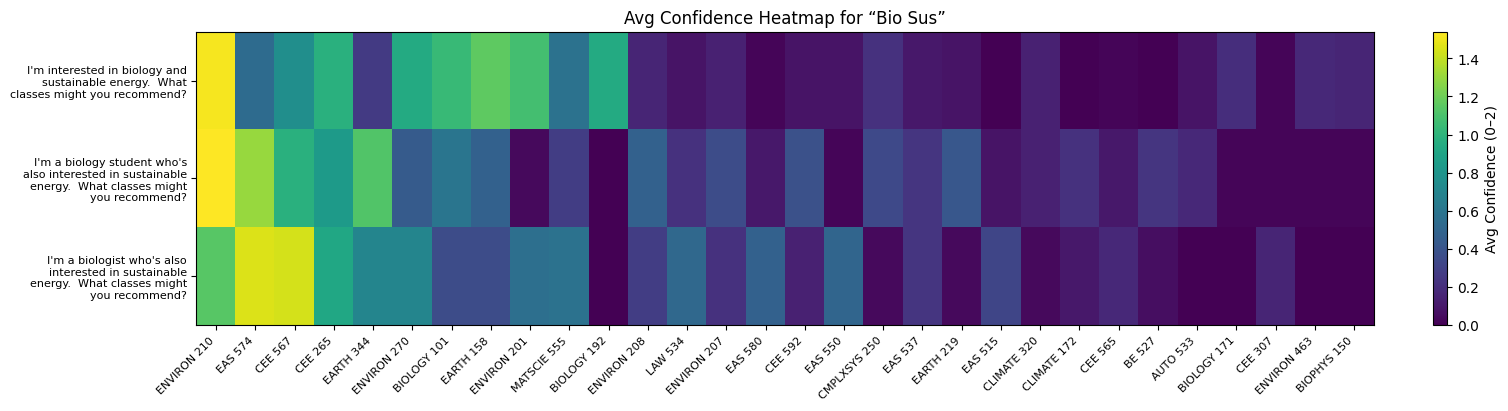

In [7]:
df = pd.read_csv('bio_sus_robotics_confidence_matrix.csv', index_col=0)

plot_confidence_heatmap(df, domain="Bio Sus", max_courses=30)


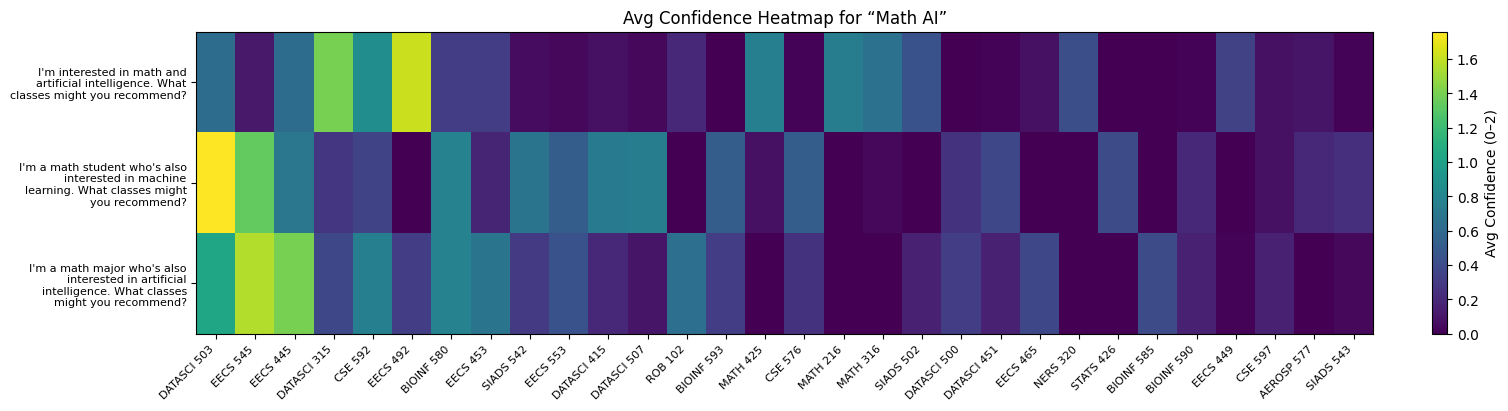

In [9]:
df = pd.read_csv('math_ai_robotics_confidence_matrix.csv', index_col=0)

plot_confidence_heatmap(df, domain="Math AI", max_courses=30)

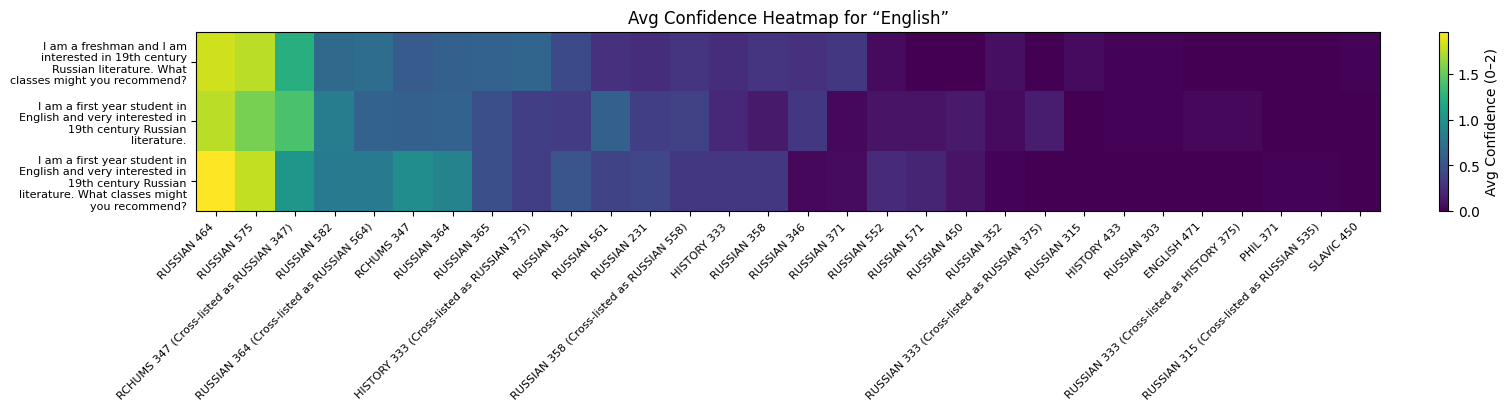

In [ ]:
df = pd.read_csv('eng_robotics_confidence_matrix.csv', index_col=0)

plot_confidence_heatmap(df, domain="English", max_courses=30)

# Old

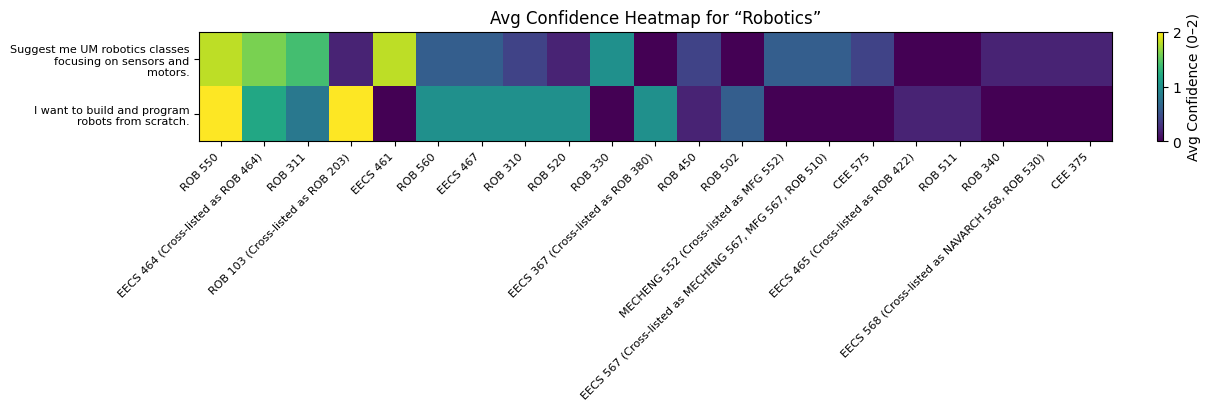

In [ ]:
# # 1. prepare your prompts for the “robotics” domain
robotics_prompts = [
    "I want to build and program robots from scratch.",
    "Suggest me UM robotics classes focusing on sensors and motors."
]

# 2. generate the matrix
df = await generate_confidence_matrix(robotics_prompts, recModel, undergrad, 5)

# 3. plot
plot_confidence_heatmap(df, domain="Robotics")

df.to_csv('robotics_confidence_matrix.csv')

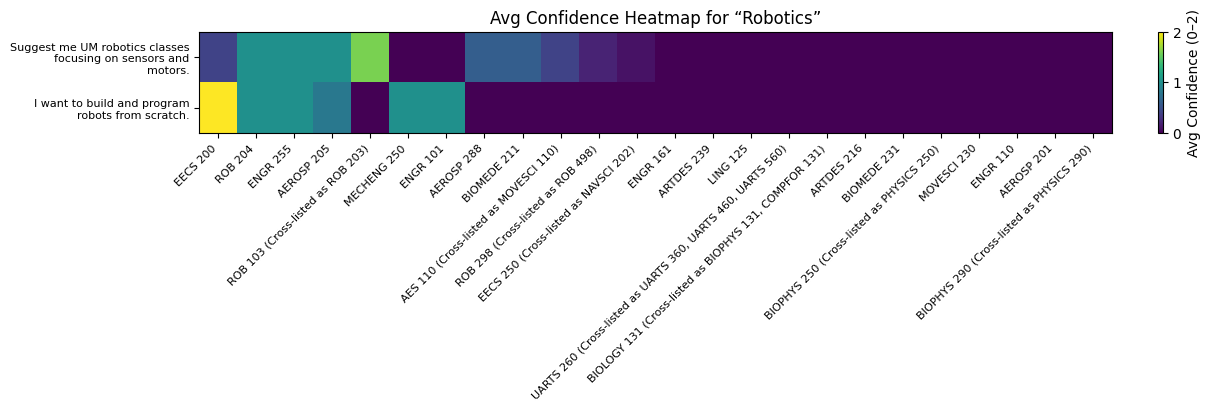

In [ ]:
# # 1. prepare your prompts for the “robotics” domain
robotics_prompts = [
    "I want to build and program robots from scratch.",
    "Suggest me UM robotics classes focusing on sensors and motors."
]

# # 2. generate the matrix
df = await generate_confidence_matrix(robotics_prompts, recModel, [100,200], 5)

# 3. plot
plot_confidence_heatmap(df, domain="Robotics")

df.to_csv('robotics_confidence_matrix_100_200.csv')

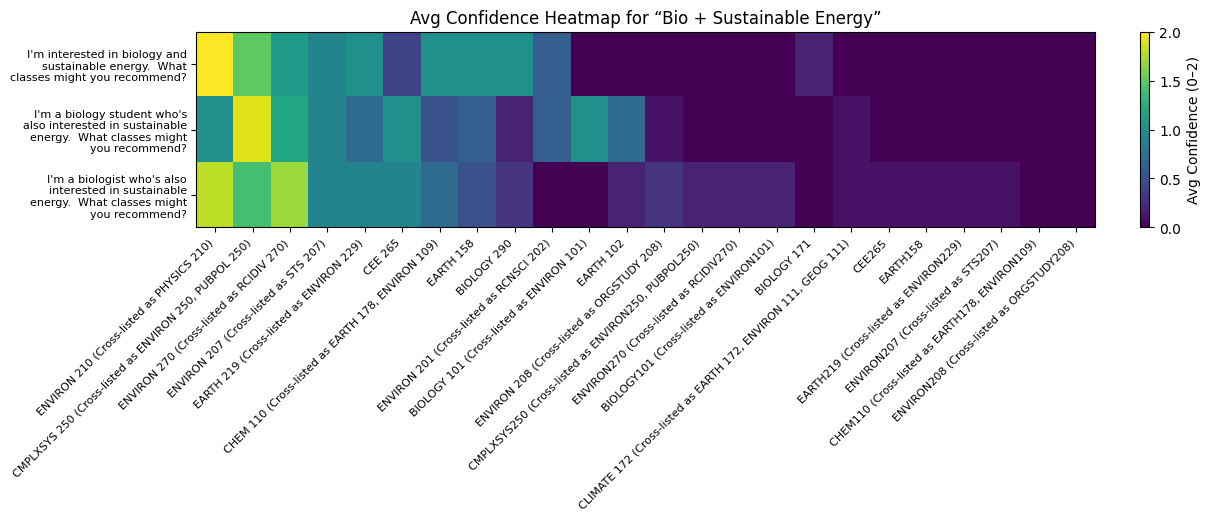

In [ ]:
prompts = [
    "I'm a biologist who's also interested in sustainable energy.  What classes might you recommend?",
    "I'm a biology student who's also interested in sustainable energy.  What classes might you recommend?",
    "I'm interested in biology and sustainable energy.  What classes might you recommend?"
]

# generate the matrix
df = await generate_confidence_matrix(prompts, recModel, [100, 200], 10)

# plot
plot_confidence_heatmap(df, domain="Bio + Sustainable Energy", height_per_row = 1.7)

df.to_csv('bio_sustainable_energy_confidence_matrix.csv')

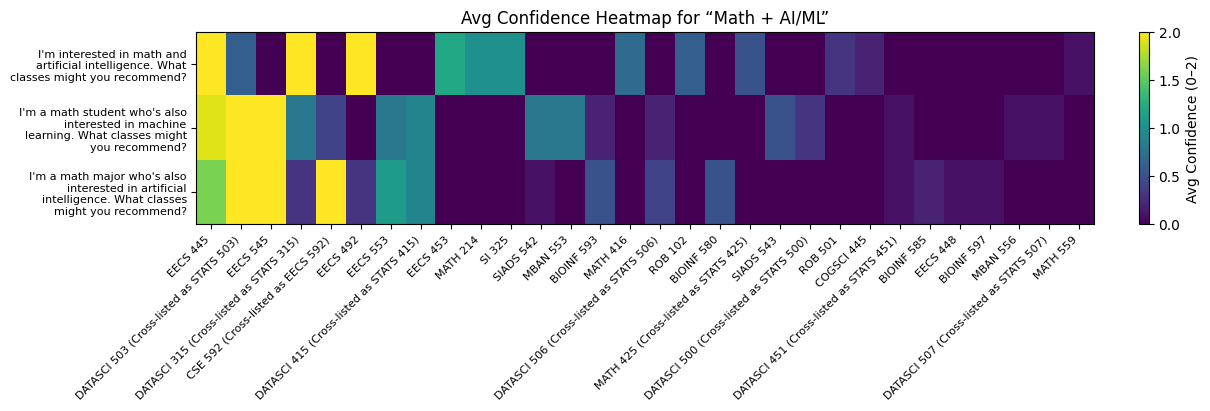

In [ ]:
prompts = [
    "I'm a math major who's also interested in artificial intelligence. What classes might you recommend?",
    "I'm a math student who's also interested in machine learning. What classes might you recommend?",
    "I'm interested in math and artificial intelligence. What classes might you recommend?"
]

# generate the matrix
df = await generate_confidence_matrix(prompts, recModel, undergrad, 10)

# plot
plot_confidence_heatmap(df, domain="Math + AI/ML")

df.to_csv('math_aiml_confidence_matrix.csv')